In [2]:
%matplotlib inline


# For Project 3, by Tony Zhao DBC_UWA 30/05/2021
# Scikit Learn California Housing Data Statistics Calculation 


In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.datasets import fetch_california_housing

In [4]:
cal_house_df = pd.read_csv('cal_housing2.csv')
cal_house_df.head()

,Unnamed: 0,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhouseval,midhval,Unnamed: 11
0,0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,2.457442,4.376012,NaN
1,1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,1.516442,3.435012,NaN
2,2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,1.452442,3.371012,NaN
3,3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,1.344442,3.263012,NaN
4,4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,1.353442,3.272012,NaN


In [5]:
df = cal_house_df.drop(['Unnamed: 0', 'midhouseval', 'Unnamed: 11'], axis=1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.376012
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.435012
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.371012
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.263012
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.272012


In [6]:
# save cal_df into csv for futher operation
df.to_csv("~/project3_challenge/cal_housing.csv")
# cal_df.head()

In [7]:
df[3:10]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.263012
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.272012
5,4.0368,52,4.761658,1.103627,413,2.139896,37.85,-122.25,2.547012
6,3.6591,52,4.931907,0.951362,1094,2.128405,37.84,-122.25,2.842012
7,3.1200,52,4.797527,1.061824,1157,1.788253,37.84,-122.25,2.264012
8,2.0804,42,4.294118,1.117647,1206,2.026891,37.84,-122.26,2.117012
9,3.6912,52,4.970588,0.990196,1551,2.172269,37.84,-122.25,2.461012


# California Housing Data Statistics

In [8]:
#get all the main statistics data for every column
col = list(df.columns)
df_statis = pd.DataFrame(df[col].describe())
df_statis.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,1.918570
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.000002
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.046012
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.647012
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.497262
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,4.850022


# Outliers calculation 

In [24]:
# Outliers and interquartile calculate
IQR = df_statis.iloc[6, 8] - df_statis.iloc[4, 8]
lowborder = df_statis.iloc[4, 8] - 1.5 * IQR
highborder = df_statis.iloc[6, 8] + 1.5 * IQR
tolerancedhigh = df_statis.iloc[6, 8] + 1.65 * IQR

print(IQR, lowborder, highborder, tolerancedhigh)

1.45125 -1.130863169 4.674136831 4.891824331


In [10]:
# outliers, it is found 1071 rows of outliners, 5% rows as outliers
# Recorded as the data defect
outlier_df = df.loc[df['midhval'] > 4.674136831]

outlier_df.head(2000)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval
89,1.2434,52,2.929412,0.917647,396,4.658824,37.80,-122.27,4.850022
140,6.3624,30,5.615385,0.730769,126,2.423077,37.81,-122.18,4.683012
459,1.1696,52,2.436000,0.944000,1349,5.396000,37.87,-122.25,4.850022
489,3.0417,48,4.690632,1.126362,1656,3.607843,37.86,-122.25,4.746012
493,7.8521,52,7.794393,1.051402,517,2.415888,37.86,-122.24,4.850022
...,...,...,...,...,...,...,...,...,...
20422,5.1457,35,6.958333,1.217593,576,2.666667,34.14,-118.90,4.850022
20426,10.0472,11,9.890756,1.159664,415,3.487395,34.18,-118.69,4.850022
20427,8.6499,4,7.236059,1.032528,5495,2.553439,34.19,-118.80,4.850022
20436,12.5420,10,9.873315,1.102426,1179,3.177898,34.21,-118.69,4.850022


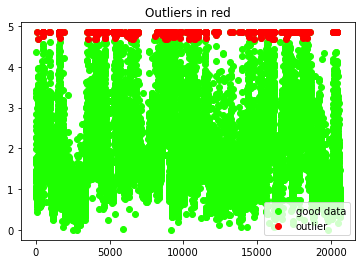

In [29]:
# outlier plot
plt.scatter(df.index, df.iloc[:, 8], c="#1EFF00", label="good data")
plt.scatter(outlier_df.index, outlier_df.iloc[:,8], c="#FF0000", label="outlier")
plt.legend(loc='lower right')
plt.title("Outliers in red")
plt.show()

In [26]:
#(0.75%)+ 1.5 * QR1 <outliers < (0.75%)+ 1.65 * QR1 
outlier2_df = df.loc[df['midhval'] > 4.891824331]
outlier2_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval


# Get Column Correlation Matrix

In [24]:
df.corr(method ='pearson')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,midhval
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
midhval,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


# Histogram for each column

Text(0.5, 1.0, 'Median Income Distribution')

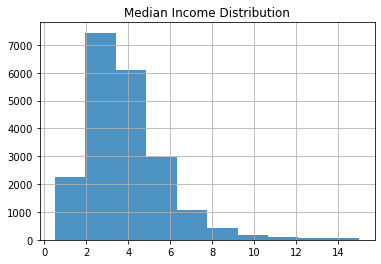

In [25]:
df['MedInc'].hist(bins= 10, alpha=0.8);
plt.title("Median Income Distribution")

Text(0.5, 1.0, 'Median House Age Distribution')

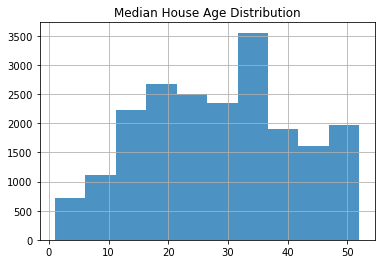

In [26]:
df['HouseAge'].hist(bins= 10, alpha=0.8);
plt.title("Median House Age Distribution")

Text(0.5, 1.0, 'Median Block Latitude Distribution')

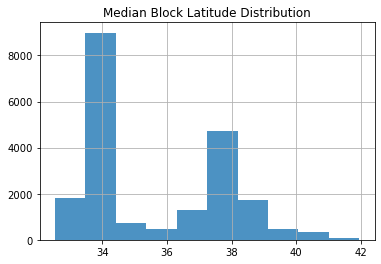

In [27]:
df['Latitude'].hist(bins= 10, alpha=0.8);
plt.title("Median Block Latitude Distribution")

Text(0.5, 1.0, 'Median Block Logitude Distribution')

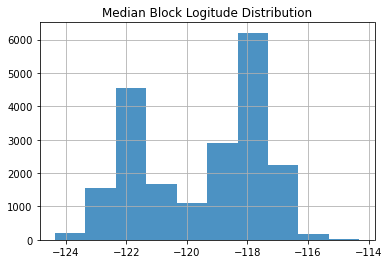

In [28]:
df['Longitude'].hist(bins= 10, alpha=0.8);
plt.title("Median Block Logitude Distribution")

Text(0.5, 1.0, 'Median Block House Value Distribution')

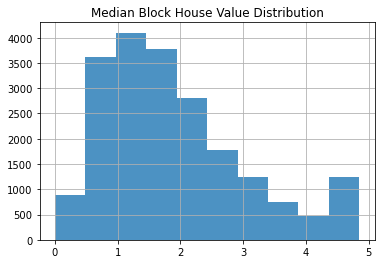

In [29]:
df['midhval'].hist(bins= 10, alpha=0.8);
plt.title("Median Block House Value Distribution")

Text(0.5, 1.0, 'Median AveRooms in Block Distribution')

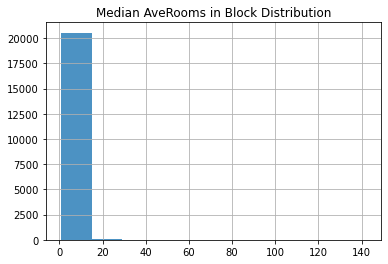

In [30]:
df['AveRooms'].hist(bins= 10, alpha=0.8);
plt.title("Median AveRooms in Block Distribution")

Text(0.5, 1.0, 'Median AveBedrms in Block Distribution')

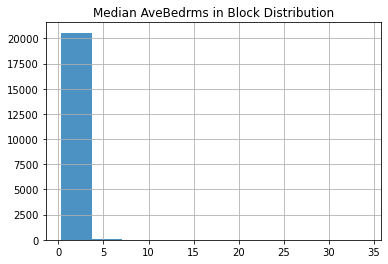

In [31]:
df['AveBedrms'].hist(bins= 10, alpha=0.8);
plt.title("Median AveBedrms in Block Distribution")

Text(0.5, 1.0, 'Median Population in Block Distribution')

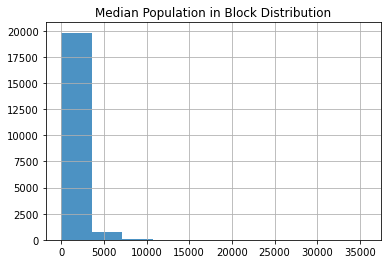

In [32]:
df['Population'].hist(bins= 10, alpha=0.8);
plt.title("Median Population in Block Distribution")

Text(0.5, 1.0, 'Median AveOccup in Block Distribution')

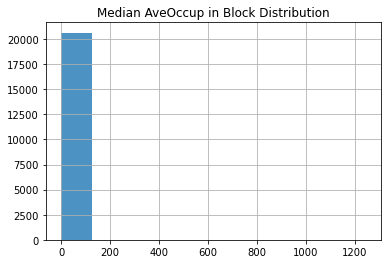

In [33]:
df['AveOccup'].hist(bins= 10, alpha=0.8);
plt.title("Median AveOccup in Block Distribution")